In [2]:
import torch
import matplotlib.pyplot as plt

In [3]:
#device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)


cpu


## creating data

In [4]:
weight = 0.3
bias = 0.9

X = torch.arange(start=0,end=1,step=0.02).unsqueeze(dim=1)

Y = weight*X + bias

X


tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

## spliting data

In [5]:
split_portion = int(0.8*len(X))
print(split_portion)
print(len(X))
x_train = X[:split_portion]
y_train = Y[:split_portion]

x_test = X[split_portion:] 
y_test = Y[split_portion:]

len(x_train),len(y_train),len(x_test),len(y_test)

40
50


(40, 40, 10, 10)

## plotting the dataset we have defined

In [6]:
def plot_the_prediction(x_train=x_train,
                        y_train=y_train,
                        x_test=x_test,
                        y_test=y_test,
                        predictions = None):

    plt.figure(figsize=(10,7))
    
    #plot the training data
    plt.scatter(x_train,y_train,c="y",s=5,label="training_dataset")

    #plot the testing data
    plt.scatter(x_test,y_test,s=10,c="b",label="testing dataset")

    #plot the predictions if exists
    if predictions is not None:
        plt.scatter(x_test,predictions,s=15,c="r",label="predictions")

    
    plt.legend(loc="upper left")


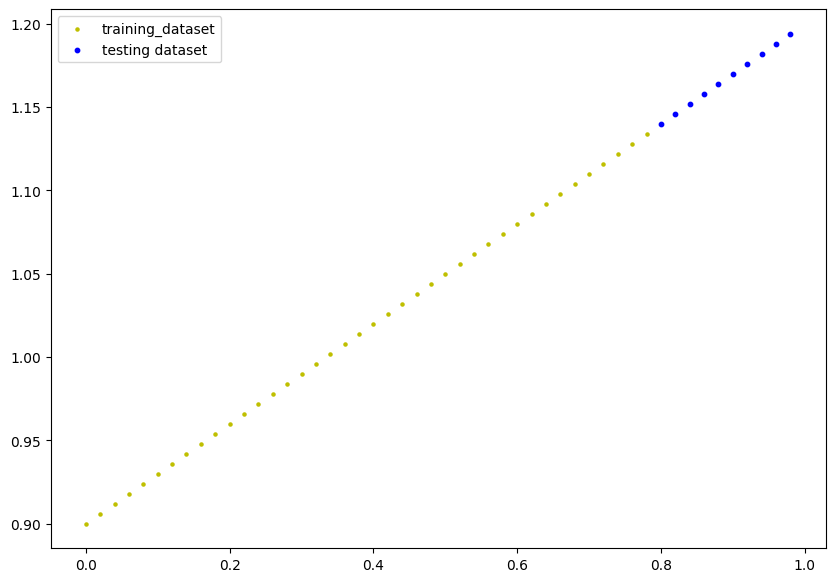

In [7]:
plot_the_prediction(x_train,y_train,x_test,y_test)

### Let's build a pyTorch model using linear layer


In [8]:
class LRModel(torch.nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)

        # self.weight = torch.nn.Parameter(torch.randn(1,
        #                                              dtype=torch.float32,
        #                                              requires_grad=True))
        # self.bias = torch.nn.Parameter(torch.randn(1,
        #                                              dtype=torch.float32,
        #                                              requires_grad=True))
        
        self.linear_layer = torch.nn.Linear(in_features=1,
                                            out_features=1)
        
    def forward(self,x: torch.Tensor) -> torch.Tensor:
        # return self.weight*x + self.bias
        return self.linear_layer(x)

In [9]:
torch.manual_seed(42)

model = LRModel()

print(model.state_dict())

OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])


In [10]:
#taking model to the device available

next(model.parameters()).device
model.to(device=device)

LRModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

### Training

loss fun

Optimizer 

training loop 

testing loop

#### Loss function

In [11]:
loss_fun = torch.nn.L1Loss()
loss_fun

L1Loss()

#### Optimizer

In [12]:
Optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.01)

## Let's build the model with training and testing loop

In [13]:
epochs = 200

#training

for epoch in range(epochs):

    model.train()

    y_preds = model(x_train)

    trainig_loss = loss_fun(y_preds,y_train)

    Optimizer.zero_grad()

    trainig_loss.backward()

    Optimizer.step()

    #testing
    
    model.eval()

    with torch.inference_mode():

        Y_preds_test = model(x_test)

        testing_loss = loss_fun(Y_preds_test,y_test)


    if epoch % 20 == 0:

        print(f"epoch : {epoch} | training loss : {trainig_loss} | testing loss : {testing_loss}")

        # plot_the_prediction(predictions=Y_preds_test) 

epoch : 0 | training loss : 0.12616769969463348 | testing loss : 0.33422544598579407
epoch : 20 | training loss : 0.08189655840396881 | testing loss : 0.21857480704784393
epoch : 40 | training loss : 0.07218800485134125 | testing loss : 0.17499032616615295
epoch : 60 | training loss : 0.06520797312259674 | testing loss : 0.15295077860355377
epoch : 80 | training loss : 0.05831370875239372 | testing loss : 0.1357191950082779
epoch : 100 | training loss : 0.051440197974443436 | testing loss : 0.11986131966114044
epoch : 120 | training loss : 0.04457508772611618 | testing loss : 0.10331656038761139
epoch : 140 | training loss : 0.03770974278450012 | testing loss : 0.08745871484279633
epoch : 160 | training loss : 0.03083621896803379 | testing loss : 0.07160083949565887
epoch : 180 | training loss : 0.02396780252456665 | testing loss : 0.055056132376194


In [14]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3852]])),
             ('linear_layer.bias', tensor([0.8645]))])

In [15]:
weight,bias

(0.3, 0.9)

In [16]:
with torch.inference_mode():
    y_new = model(x_test)

y_new,y_test

(tensor([[1.1726],
         [1.1803],
         [1.1880],
         [1.1957],
         [1.2034],
         [1.2112],
         [1.2189],
         [1.2266],
         [1.2343],
         [1.2420]]),
 tensor([[1.1400],
         [1.1460],
         [1.1520],
         [1.1580],
         [1.1640],
         [1.1700],
         [1.1760],
         [1.1820],
         [1.1880],
         [1.1940]]))

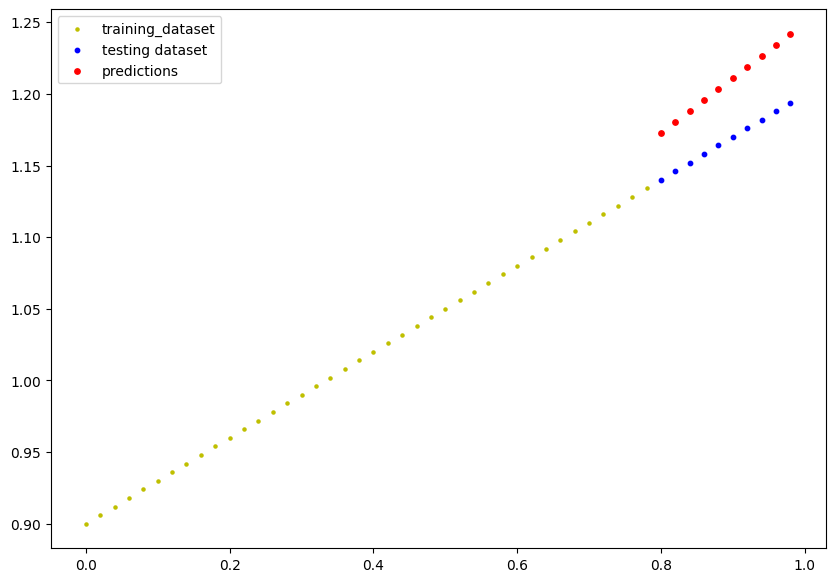

In [17]:
plot_the_prediction(predictions=y_new)

### saving the model

In [18]:
PATH = "./models/raplica.pth"
torch.save(obj=model.state_dict(),f=PATH)

### load the model

In [19]:
#instantiate new model

new_model = LRModel()

new_model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [20]:
# with torch.inference_mode():
yyy = model(x_test)

yyy_1 = new_model(x_test)

In [21]:
yyy == yyy_1

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [22]:
LRModel()

LRModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)